## Data Preparation

In [119]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.dates import DateFormatter
import folium

%matplotlib inline
mpl.style.use(['ggplot'])

In [120]:
df = pd.read_csv("london_crime_by_lsoa.csv")

In [121]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [122]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [124]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [125]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [126]:
df.shape

(13490604, 7)

In [127]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\Nurianti\AppData\Local\Temp/ipykernel_27400/552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [128]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [129]:
if df.isnull().values.any() == True:
    print('Terdapat missing value pada dataset')
else:
    print('Tidak ada missing value pada dataset')

Tidak ada missing value pada dataset


In [130]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [131]:
df.lsoa_code

0           E01001116
1           E01001646
2           E01000677
3           E01003774
4           E01004563
              ...    
13490599    E01000504
13490600    E01002504
13490601    E01004165
13490602    E01001134
13490603    E01003413
Name: lsoa_code, Length: 13490604, dtype: object

In [132]:
print('Boroughs (' + str(df.borough.nunique()) + '):')
for value in sorted(df.borough.unique()):
    print('- ' + value)

print('Major Categories of Crimes (' + str(df.major_category.nunique()) + '):')
for value in sorted(df.major_category.unique()):
    print('- ' + value)

Boroughs (33):
- Barking and Dagenham
- Barnet
- Bexley
- Brent
- Bromley
- Camden
- City of London
- Croydon
- Ealing
- Enfield
- Greenwich
- Hackney
- Hammersmith and Fulham
- Haringey
- Harrow
- Havering
- Hillingdon
- Hounslow
- Islington
- Kensington and Chelsea
- Kingston upon Thames
- Lambeth
- Lewisham
- Merton
- Newham
- Redbridge
- Richmond upon Thames
- Southwark
- Sutton
- Tower Hamlets
- Waltham Forest
- Wandsworth
- Westminster
Major Categories of Crimes (9):
- Burglary
- Criminal Damage
- Drugs
- Fraud or Forgery
- Other Notifiable Offences
- Robbery
- Sexual Offences
- Theft and Handling
- Violence Against the Person


In [133]:
print('Dataset was recorded from ' + str(df.year.min()) + ' to ' + str(df.year.max()))

Dataset was recorded from 2008 to 2016


## Data Visualization

In [134]:
df_violence = pd \
    .pivot_table(
        df[df.major_category == 'Violence Against the Person'], 
        values='value', 
        index='minor_category', 
        columns='year', 
        aggfunc='sum'
    ) \
    .rename_axis('Years', axis=1) \
    .rename_axis('Minor Categories', axis=0)

display(df_violence)

Years,2008,2009,2010,2011,2012,2013,2014,2015,2016
Minor Categories,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676
Murder,130,119,113,105,95,96,81,109,101
Offensive Weapon,5961,4520,4229,3991,3134,3315,3676,4144,5013
Other violence,7721,7571,6947,6414,6623,7628,7785,9501,10588
Wounding/GBH,8701,10005,8033,7628,7151,15526,21556,23431,23525


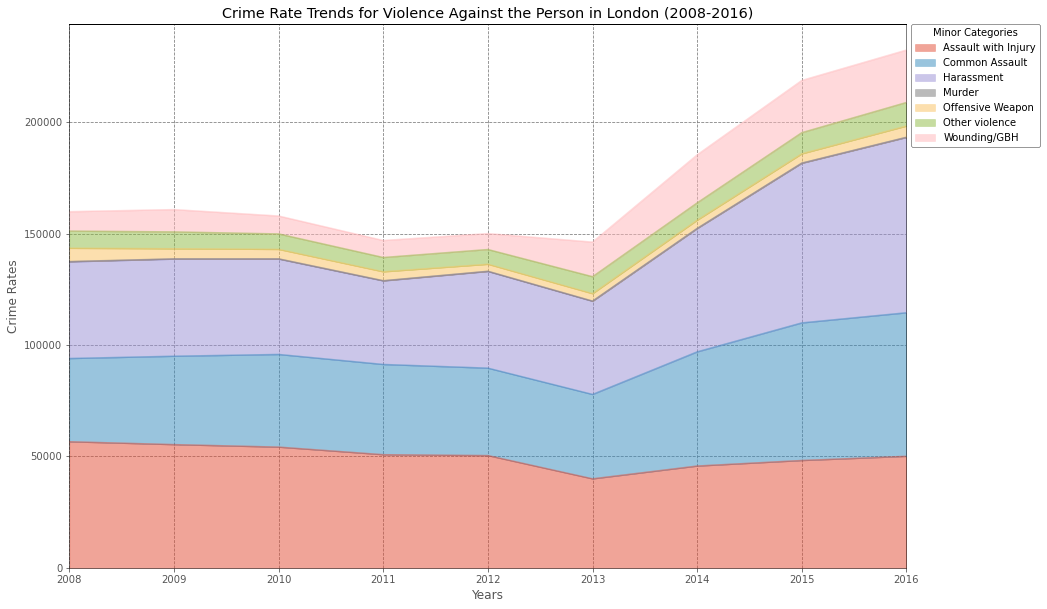

In [135]:
ax = df_violence.T.plot(kind='area', stacked=True, figsize=(15, 10), alpha=.5)

ax.legend(bbox_to_anchor=(1, 1.01), loc='upper left', title='Minor Categories', 
          facecolor='white', edgecolor='black')

ax.grid(b=True, linestyle='dashed', color='gray')
ax.patch.set_alpha(0)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(.5)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.title('Crime Rate Trends for Violence Against the Person in London (2008-2016)')
plt.ylabel('Crime Rates')
plt.xlabel('Years')
plt.margins(x=0)
plt.show()

In [136]:
select_boroughs = ['Westminster', 'Brent', 'Lambeth', 'Newham']

df_drugs = pd \
    .pivot_table(
        df[
            (df.major_category == 'Drugs') 
            & (df.borough.isin(select_boroughs))
        ], 
        values='value', 
        index='year', 
        columns='borough', 
        aggfunc='sum'
    ) \
    .rename_axis('Boroughs', axis=1) \
    .rename_axis('Years', axis=0)

display(df_drugs)

Boroughs,Brent,Lambeth,Newham,Westminster
Years,,,,
2008,2813,3848,2526,4075
2009,2579,3154,2365,3894
2010,2980,2950,2772,4632
2011,4042,2920,2160,5670
2012,3428,2290,1857,4654
2013,3341,1894,1622,4151
2014,2891,2637,1721,2804
2015,1808,2652,1682,2102
2016,2096,2738,1684,2049


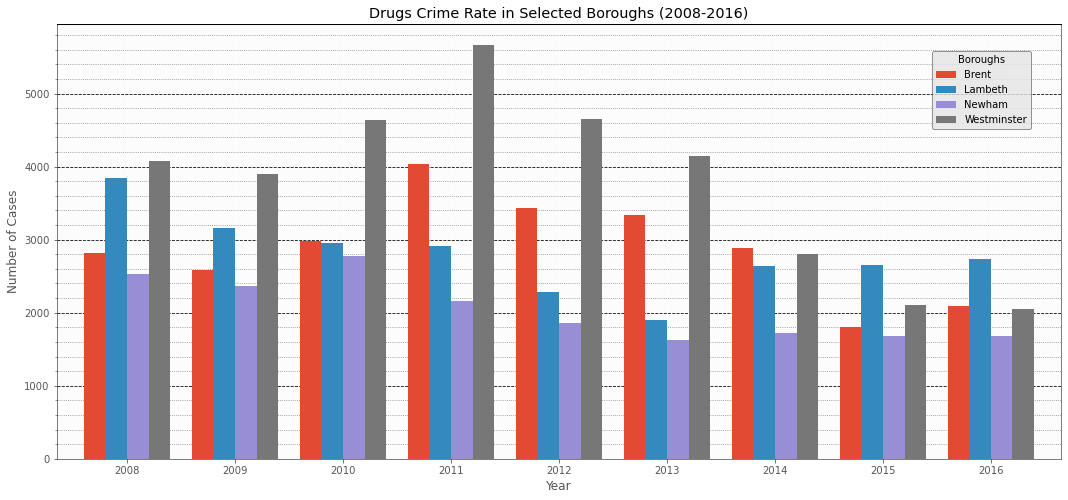

In [137]:
ax = df_drugs.plot(kind='bar', figsize=(18, 8), width=.8)

ax.legend(title='Boroughs', edgecolor='black', bbox_to_anchor=(.975, .95))

ax.grid(b=True, axis='y', which='major', linestyle='dashed', color='black')
ax.grid(b=True, axis='y', which='minor', linestyle='dotted', color='gray')
ax.tick_params(axis='x', which='minor', bottom=False)
ax.patch.set_alpha(.1)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(.5)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.title('Drugs Crime Rate in Selected Boroughs (2008-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.minorticks_on()
plt.show()

In [138]:
df_crime = pd \
    .pivot_table(
        df, 
        values='value', 
        index='major_category', 
        columns='year', 
        aggfunc='sum'
    ) \
    .rename_axis('Years', axis=1) \
    .rename_axis('Major Categories', axis=0)

display(df_crime)

Years,2008,2009,2010,2011,2012,2013,2014,2015,2016
Major Categories,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


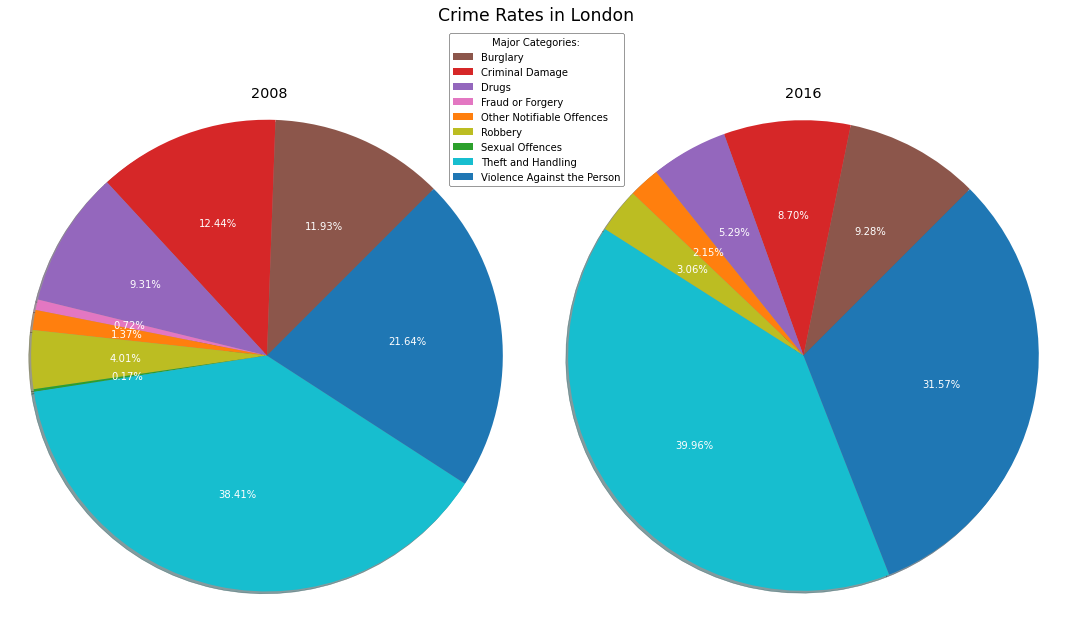

In [139]:
colors = [
    'tab:brown', 'tab:red', 'tab:purple', 
    'tab:pink', 'tab:orange', 'tab:olive', 
    'tab:green', 'tab:cyan', 'tab:blue'
]
select_years = [2008, 2016]

fig, ax = plt.subplots(1, 2, figsize=(15, 8), tight_layout=True)
fig.suptitle('Crime Rates in London', fontsize='xx-large', y=1.07)

for i in range(len(select_years)):
    ax[i].pie(
        df_crime[select_years[i]], 
        labels=None, 
        shadow=True, 
        startangle=45, 
        radius=2, 
        autopct=lambda p: '{:.2f}%'.format(p) if (p > 0) else '', 
        colors=colors, 
        textprops={'color': 'w'}
    )
    ax[i].axis('equal')
    ax[i].set_title(str(select_years[i]))

fig.legend(
    df_crime.index.values, 
    title='Major Categories:', 
    loc='lower center', 
    bbox_to_anchor=(.5, .75), 
    facecolor='white', 
    edgecolor='black'
)
plt.show()

In [140]:
df_damage = pd \
    .pivot_table(
        df[(df.major_category == 'Criminal Damage')], 
        values='value', 
        index='year', 
        columns='minor_category', 
        aggfunc='sum'
    ) \
    .rename_axis('Minor Categories', axis=1) \
    .rename_axis('Years', axis=0)

display(df_damage)

Minor Categories,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Other Criminal Damage
Years,,,,
2008,23519,41693,9011,17649
2009,22475,36621,8348,18121
2010,20253,32907,7962,16775
2011,18037,29494,7445,15938
2012,15330,25777,6753,14298
2013,13512,23452,6367,12875
2014,13391,24137,6641,15110
2015,13648,25595,6776,16957
2016,13951,25787,6700,17633


In [141]:
with pd.option_context('display.precision', 3):
    display(df_damage.describe())

Minor Categories,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Other Criminal Damage
count,9.00,9.000,9.000,9.000
mean,17124.00,29495.889,7333.667,16150.667
std,4069.77,6316.859,916.068,1755.530
min,13391.00,23452.000,6367.000,12875.000
25%,13648.00,25595.000,6700.000,15110.000
50%,15330.00,25787.000,6776.000,16775.000
75%,20253.00,32907.000,7962.000,17633.000
max,23519.00,41693.000,9011.000,18121.000


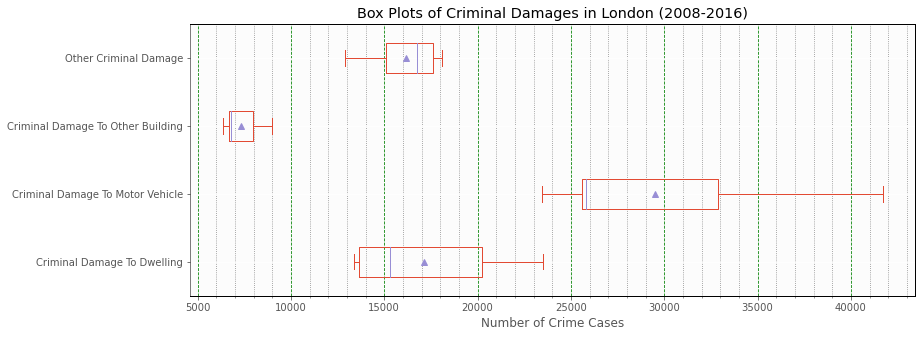

In [142]:
ax = df_damage.plot(kind='box', figsize=(13, 5), vert=False, showmeans=True)

ax.grid(b=True, which='major', linestyle='dashed', color='green', axis='x')
ax.grid(b=True, which='minor', linestyle='dotted', color='gray', axis='x')
ax.tick_params(axis='y', which='minor', left=False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(.5)
ax.patch.set_alpha(.1)

plt.title('Box Plots of Criminal Damages in London (2008-2016)')
plt.xlabel('Number of Crime Cases')
plt.minorticks_on()
plt.show()

In [143]:
df_robbery = df[df.major_category == 'Robbery'] \
    .groupby(['year', 'month'], as_index=False)['value'].sum()
df_robbery.insert(0, 'year_month', 
    pd.to_datetime(
        df_robbery[['year', 'month']].apply(
            lambda x: '-'.join(x.values.astype(str)), 
            axis="columns"
        )
    )
)
display(df_robbery)


,year_month,year,month,value
0,2008-01-01,2008,1,2887
1,2008-02-01,2008,2,2455
2,2008-03-01,2008,3,2585
3,2008-04-01,2008,4,2498
4,2008-05-01,2008,5,2490
...,...,...,...,...
103,2016-08-01,2016,8,1910
104,2016-09-01,2016,9,1980
105,2016-10-01,2016,10,2048
106,2016-11-01,2016,11,1983


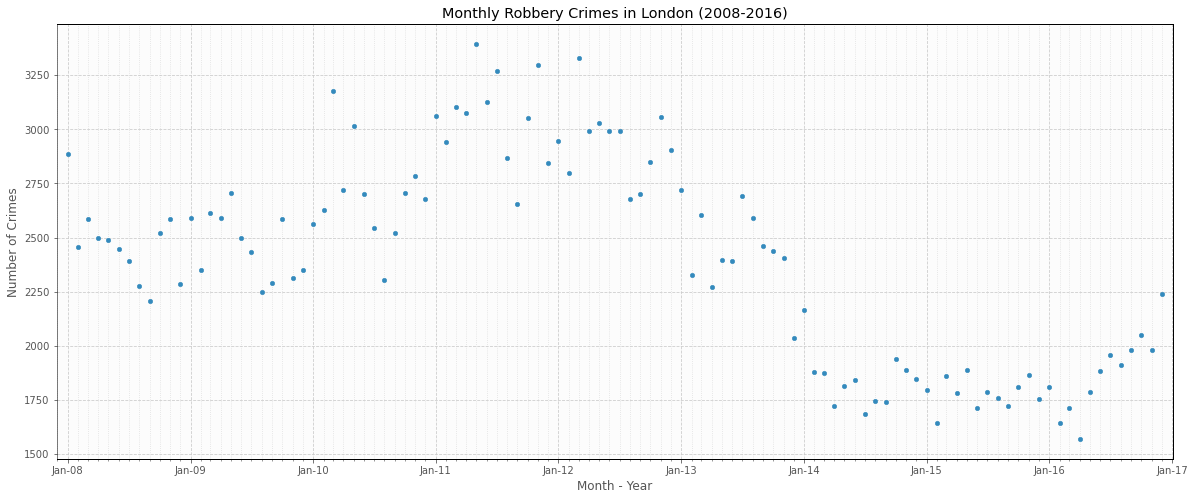

In [144]:
ax = df_robbery.plot(kind='scatter', figsize=(20, 8), x='year_month', y='value')

ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.grid(b=True, which='major', linestyle='dashed', color='#cccccc', axis='both')
ax.grid(b=True, which='minor', linestyle='dotted', color='#dddddd', axis='x')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(.5)
ax.patch.set_alpha(.1)

plt.title('Monthly Robbery Crimes in London (2008-2016)')
plt.xlabel('Month - Year')
plt.ylabel('Number of Crimes')
plt.margins(x=.01)
plt.show()

In [145]:
london_map = folium.Map(location=[51.51275, -0.12632], zoom_start=11)
display(london_map)

## Analisis

Hasil dari menganalisis dan memvisualisasikan berbagai data dari London Crime Dataset.

Pada visualisasi pertama, dapat diketahui tren kekerasan terhadap tingkat kejahatan orang di London secara keseluruhan menggunakan grafik area. Selanjutnya, histogram. Dari grafik dapat dilihat sebaran data pencurian dan penanganan catatan kriminal.

yang ketiga terdapat diagram batang yang menampilkan variabel numerik dan kategori yang dikelompokkan dalam interval. dengan memilih beberapa wilayah secara acak yang catatannya kira-kira besar.

Pie chart dalam kasus ini, digunakan untuk melihat persentase major category crimes di London Raya untuk tahun 2008 dan 2016. Ditemukan bahwa ada perubahan proporsi dari kedua tahun tersebut dan ternyata ada dua kategori yang tidak dicatat pada tahun 2016.

Box plot digunakan kategori kerusakan pidana dan kami telah menemukan bahwa kerusakan kendaraan bermotor memiliki distribusi data tertinggi dan terpanjang dibandingkan dengan yang lain.

Terakhir menggunakan peta Folium untuk memvisualisasikan data. dari peta folium dapat dilihat perkiraan luasnya di London dan itu adalah boroughs